# ***Supermarket_sales data visualization and KNN classification***

**importing necessary libraries**

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


 **reading csv file**

In [329]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.shape

(1000, 17)

In [330]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


The head() method returns a specified 5 rows, string from the top.

In [331]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

we have three data types: Object, float and integer

In [332]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [333]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [334]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day


In [335]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,month,day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,2019.0,1.993000,15.256000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.0,0.835254,8.693563
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,2019.0,1.000000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,2019.0,1.000000,8.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2019.0,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,2019.0,3.000000,23.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,2019.0,3.000000,31.000000


To calculate summary statistics for a Pandas DataFrame,we  use the df.describe() method. This returns a summary of the data, including the count, mean, standard deviation, minimum, maximum, and quartiles

## visualizing data

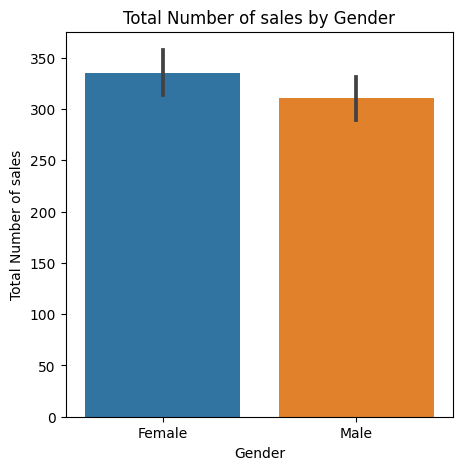

In [336]:
plt.figure(figsize=(5, 5)) # Set the figure size

sns.barplot(x = 'Gender', y = 'Total', data = df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Total Number of sales')
plt.title('Total Number of sales by Gender')

# Show the plot
plt.show()

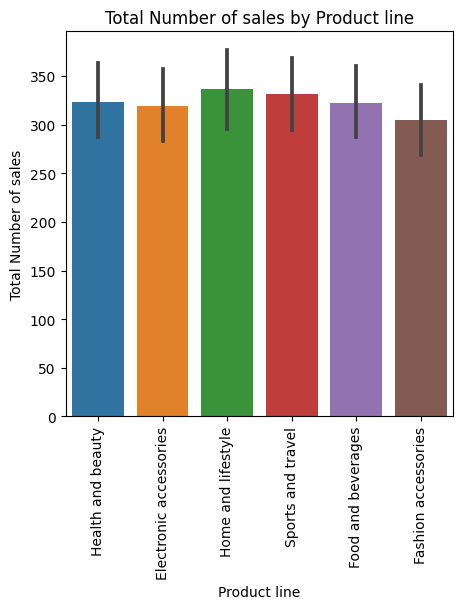

In [337]:
#category_count = df.groupby('Product line')['Total'].count()

plt.figure(figsize=(5, 5)) # Set the figure size

# Create the bar plot
sns.barplot(x = 'Product line', y = 'Total', data = df)
#category_count.plot(kind='bar',color="pink")

# Add labels and title
plt.xlabel('Product line')
plt.ylabel('Total Number of sales')
plt.title('Total Number of sales by Product line')
plt.xticks(rotation=90)

plt.show()

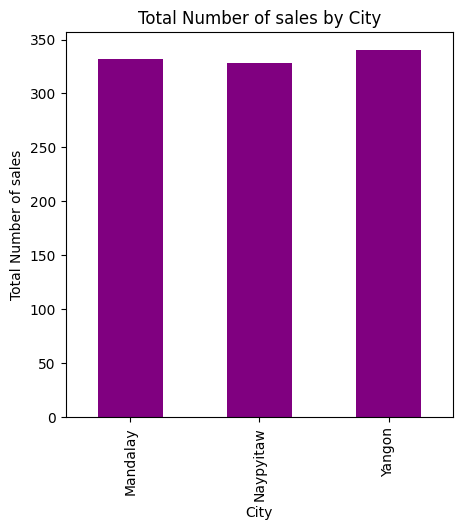

In [338]:
category_count = df.groupby('City')['Total'].count()

plt.figure(figsize=(5, 5)) # Set the figure size

# Create the bar plot
category_count.plot(kind='bar',color="purple")

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Number of sales')
plt.title('Total Number of sales by City')

plt.show()

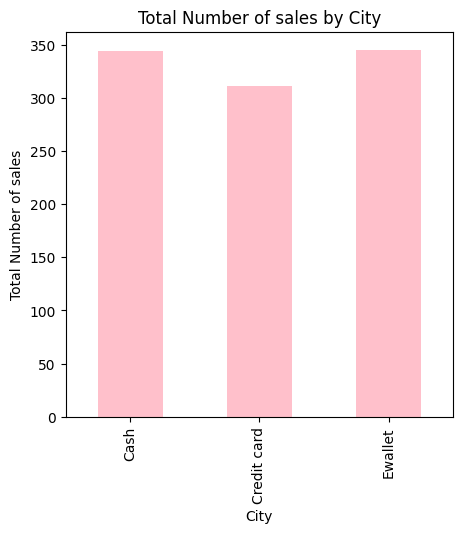

In [339]:
category_count = df.groupby('Payment')['Total'].count()

plt.figure(figsize=(5, 5)) # Set the figure size

# Create the bar plot
category_count.plot(kind='bar',color="pink")

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Number of sales')
plt.title('Total Number of sales by City')

plt.show()

In [340]:
# creating dummies for gender and customer type
df.rename(columns = {'Customer type':'Customer_Type'}, inplace = True)
Customer_Type ={'Member':1, 'Normal':0}
Gender={'Female':1, 'Male':0}

In [341]:
df['Customer_Type']=df['Customer_Type'].map(Customer_Type)
df['Gender']=df['Gender'].map(Gender)

df.head()

,Invoice ID,Branch,City,Customer_Type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,month,day
0,750-67-8428,A,Yangon,1,1,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,0,1,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,0,0,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,1,0,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,0,0,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8


I decided to convert Gender and Customer type into a dummy variable. Since it is currently a categorical variable that can take on two different values.

In [342]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Branch','City','Product line','Payment'])
one_hot_encoded_data

,Invoice ID,Customer_Type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,...,City_Yangon,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,750-67-8428,1,1,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,...,1,0,0,0,1,0,0,0,0,1
1,226-31-3081,0,1,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,...,0,1,0,0,0,0,0,1,0,0
2,631-41-3108,0,0,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,...,1,0,0,0,0,1,0,0,1,0
3,123-19-1176,1,0,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,...,1,0,0,0,1,0,0,0,0,1
4,373-73-7910,0,0,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,0,0,40.35,1,2.0175,42.3675,1/29/2019,13:46,40.35,...,0,0,0,0,1,0,0,0,0,1
996,303-96-2227,0,1,97.38,10,48.6900,1022.4900,3/2/2019,17:16,973.80,...,0,0,0,0,0,1,0,0,0,1
997,727-02-1313,1,0,31.84,1,1.5920,33.4320,2/9/2019,13:22,31.84,...,1,0,0,1,0,0,0,1,0,0
998,347-56-2442,0,0,65.82,1,3.2910,69.1110,2/22/2019,15:33,65.82,...,1,0,0,0,0,1,0,1,0,0


In [343]:
one_hot_encoded_data.shape

(1000, 31)

In [344]:
x = one_hot_encoded_data.drop(['Invoice ID','Total','Date','Time'], axis=1)
y = one_hot_encoded_data['Total']
x.shape, y.shape

((1000, 27), (1000,))

In [345]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [346]:
x = pd.DataFrame(x_scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.998002,0.998002,0.718160,0.509930,0.919607,0.919607,0.0,0.919607,1.238443,0.0,...,1.393261,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
1,-1.002002,0.998002,-1.525303,-0.174540,-0.987730,-0.987730,0.0,-0.987730,1.529527,0.0,...,-0.717741,2.209605,-0.465344,-0.45897,-0.423374,-0.436436,-0.44614,1.380933,-0.671847,-0.725753
2,-1.002002,-1.002002,-0.352781,0.509930,0.071446,0.071446,0.0,0.071446,0.248760,0.0,...,1.393261,-0.452570,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,-0.724148,1.488433,-0.725753
3,0.998002,-1.002002,0.096214,0.852165,0.675780,0.675780,0.0,0.675780,0.830927,0.0,...,1.393261,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
4,-1.002002,-1.002002,1.156959,0.509930,1.267125,1.267125,0.0,1.267125,-0.973790,0.0,...,1.393261,-0.452570,-0.465344,-0.45897,-0.423374,-0.436436,2.24145,-0.724148,-0.671847,1.377879


In [347]:
# Taking 30% data as test and 70% as training data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =56)

## Checking Consistency , using Cross Validation


In [348]:
score = cross_val_score( KNeighborsRegressor(n_neighbors = 3), X =X_train , y = y_train, cv = 10)
score

array([0.85392286, 0.81418924, 0.70135049, 0.78327019, 0.83776364,
       0.75745169, 0.85317983, 0.82801827, 0.79502222, 0.83970833])

In [349]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(80.638767667226, 4.600401661076807)

In [350]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []

    for i in n_neighbors:

    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNeighborsRegressor(n_neighbors = i) , X = X_train, y = y_train, cv = 10)

    # adding mean to avg list
      avg.append(score.mean())

    # adding standard deviation to std list
      std.append(score.std())

    return avg, std

In [351]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

Text(0.5, 1.0, 'Mean Validation score')

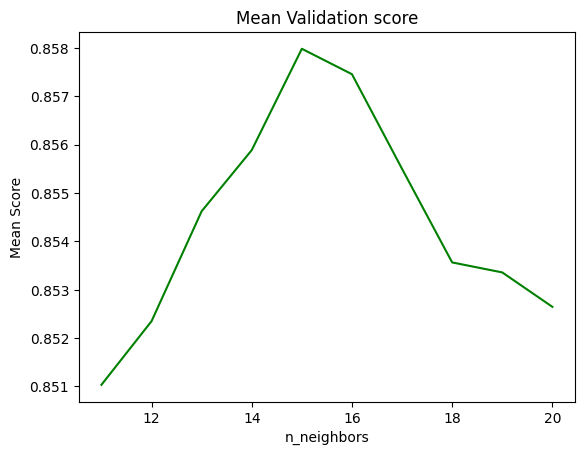

In [352]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

Text(0.5, 1.0, 'Standard Deviation of Validation score')

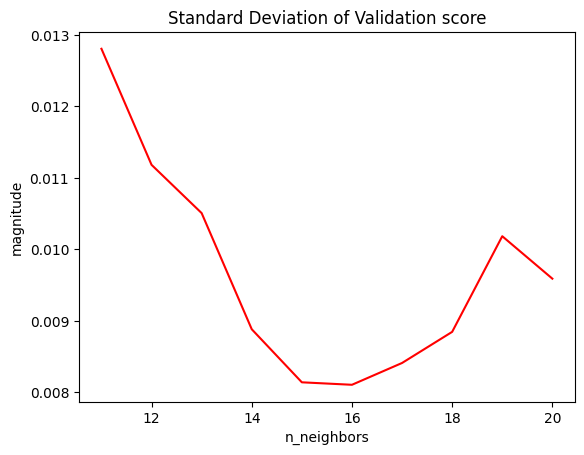

In [353]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

The n_neighbor with least standard Deviation score will correspond to the best k value, as we can see the graph is having a global minima.

In [354]:
optimal_k =n_neighbors[std.index(min(std))]
print("Optimal K: ", optimal_k)

Optimal K:  30


In [355]:
clf = KNeighborsRegressor(n_neighbors = 15)
clf.fit(X_train, y_train)

score1 = clf.score(X_train, y_train)

score = clf.score(X_test, y_test)
score, score1

(0.8629373177155757, 0.8759857206004229)

In [356]:
# Training the model on Optimal K.
clf_optimal = KNeighborsRegressor(n_neighbors = 15)
clf_optimal.fit(X_train, y_train)
y_pred = clf_optimal.predict(X_test)
acc = clf_optimal.score(X_test, y_test)


In [357]:
#Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Accuracy: ", acc*100)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Accuracy:  86.29373177155757
Mean Absolute Error: 75.66047533333334
Mean Squared Error: 8669.234151795
R-squared: 0.8629373177155757


In the code above, `y_pred` contains the predicted values on the test set using the trained model. Then, we import the necessary metrics from scikit-learn (`mean_squared_error` ,`mean_absolute_error` and `r2_score`) to evaluate the model's performance.

The `mean_squared_error` function calculates the mean squared error between the true values (`y_test`) and the predicted values (`y_pred`).

Handling outliers would have given me lower value of MSE,but in this case I  didn't handle them. Instead I used MAE.


In [358]:
#What features have the most impact on the 'Total' sales amount?
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the correlation values in descending order
correlation_sorted = correlation_matrix['Total'].sort_values(ascending=False)

# Print the features with the highest correlation to 'Total'
print(correlation_sorted)


Total                      1.000000
Tax 5%                     1.000000
gross income               1.000000
cogs                       1.000000
Quantity                   0.705510
Unit price                 0.633962
Gender                     0.049451
Customer_Type              0.019670
day                       -0.002515
month                     -0.022301
Rating                    -0.036442
gross margin percentage         NaN
Year                            NaN
Name: Total, dtype: float64


This code calculates the correlation matrix for all columns in the dataframe, and then sorts the correlation values for the 'Total' column in descending order.As we can see in the output above,it printed the features with the highest correlation to 'Total'. The features with higher correlation values are likely to have a stronger impact on the 'Total' sales amount.